In [13]:
%matplotlib inline
import matplotlib.pyplot as mpl

from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn import tree

### Load Data

In [14]:
iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data, iris.target)

### Visualize Decision Tree

You can create a dot file easily with .export_graphviz. Converting it to png can be a hassle without homebrew or conda (if you have a mac). If you don't want to install graphviz, you can use an [online converter](http://webgraphviz.com). 

In [15]:
tree.export_graphviz(clf,
                     out_file="iris_depth2_decisionTree.dot",
                     feature_names=iris.feature_names,
                     class_names=iris.target_names, 
                     filled = False)

In [10]:
tree.export_graphviz?

In [16]:
!dot -Tsvg iris_depth2_decisionTree.dot -o iris_depth2_decisionTree.svg

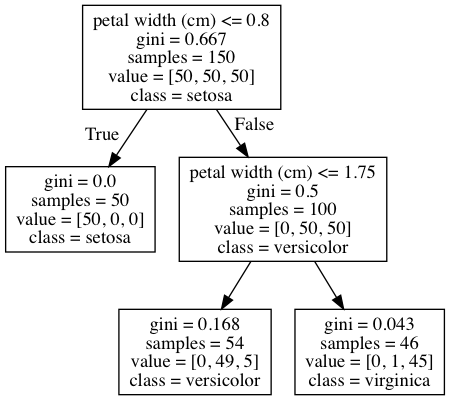

In [12]:
PATH = !pwd
Image(filename = PATH[0] + "/iris_depth2_decisionTree.png")